In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## Recap from last week
1.	A short paragraph describing the chronic condition that the group selected, including some factors that contribute to its development and how it affects patients.  
2.	One or two paragraphs outlining and describing some of the features that the group thinks would be useful for predicting the prevalence of the chronic condition. It is okay if the students do not have the datasets downloaded for these features quite yet (but great if they do), more so looking to see what the students think will be relevant.

### Load in target data

In [23]:
# read in data
# rename analysis value to something meaningful
# select necessary columns
# add leading zero to FIPS
df_target_data = pd.read_csv('./data/COPD Prevalence.csv')
df_target_data.rename(columns={'analysis_value': 'copd_prevalence'}, inplace=True)
df_target_data = df_target_data[['year','measure','condition','fips','county','state','copd_prevalence']]
df_target_data['fips'] = df_target_data['fips'].astype(str).str.zfill(5)

print(df_target_data.shape[0])
df_target_data.head(15)

3241


,year,measure,condition,fips,county,state,copd_prevalence
0,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01001,Autauga County,ALABAMA,16
1,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01003,Baldwin County,ALABAMA,12
2,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01005,Barbour County,ALABAMA,14
3,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01007,Bibb County,ALABAMA,16
4,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01009,Blount County,ALABAMA,17
5,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01011,Bullock County,ALABAMA,9
6,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01013,Butler County,ALABAMA,16
7,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01015,Calhoun County,ALABAMA,19
8,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01017,Chambers County,ALABAMA,17
9,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01019,Cherokee County,ALABAMA,19


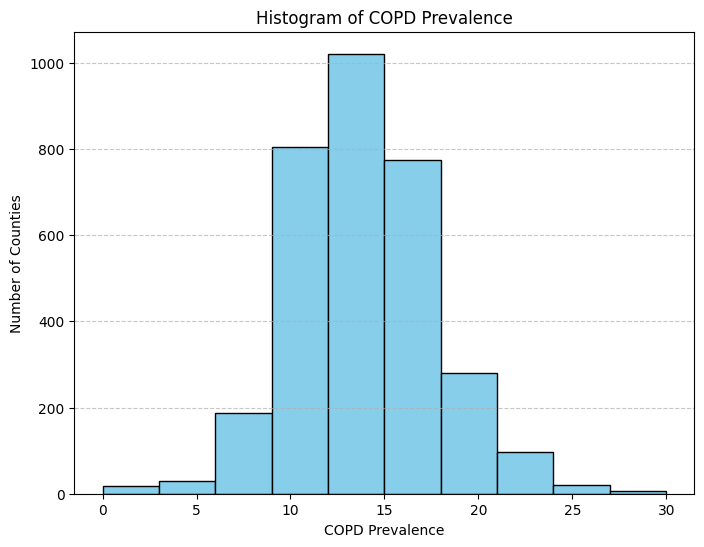

In [24]:
# Plot the histogram of copd_prevalence
plt.figure(figsize=(8, 6))  # Set figure size
plt.hist(df_target_data["copd_prevalence"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of COPD Prevalence")
plt.xlabel("COPD Prevalence")
plt.ylabel("Number of Counties")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Optional grid for clarity
plt.show()

### Load in feature data

The “GEO.ID” field contains 14-digit codes that identify the summary level of data, the geographic component of the data and FIPS codes that uniquely identify the data.  

For example, the 14-digit “GEO.ID” for Harris County, TX is “0500000US48201”  
“050” represents the summary level of the data  
“0000” represents the 2-digit geographic variant and the 2-digit geographic component  
“US” represents the United States  
“48” represents the state of Texas  
“201” represents Harris County.  

Together “48” and “201” represent the FIPS Code for Harris County, TX 

In [25]:
df_feature_data = pd.read_csv('./data/K202703 Public Health Insurance Status.csv', header=[0,1]) # adding header=[0,1] to tell code that there are two header columns
print(df_feature_data.shape[0])
df_feature_data.head(15)

1909


,GEO_ID,NAME,K202703_001E,K202703_001M,K202703_002E,K202703_002M,K202703_003E,K202703_003M,Unnamed: 8_level_0
,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!With public coverage,Margin of Error!!Total:!!With public coverage,Estimate!!Total:!!No public coverage,Margin of Error!!Total:!!No public coverage,Unnamed: 8_level_1
0,0500000US01001,"Autauga County, Alabama",59594.0,238.0,21873.0,2961.0,37721.0,2967.0,NaN
1,0500000US01003,"Baldwin County, Alabama",250117.0,696.0,95007.0,5402.0,155110.0,5326.0,NaN
2,0500000US01005,"Barbour County, Alabama",21384.0,130.0,9172.0,1458.0,12212.0,1463.0,NaN
3,0500000US01007,"Bibb County, Alabama",19950.0,133.0,7528.0,1364.0,12422.0,1396.0,NaN
4,0500000US01009,"Blount County, Alabama",59402.0,17.0,23889.0,1958.0,35513.0,1959.0,NaN
5,0500000US01015,"Calhoun County, Alabama",114027.0,270.0,47352.0,3052.0,66675.0,3019.0,NaN
6,0500000US01017,"Chambers County, Alabama",33592.0,18.0,12462.0,1616.0,21130.0,1620.0,NaN
7,0500000US01019,"Cherokee County, Alabama",24586.0,2760.0,10693.0,1481.0,13893.0,2211.0,NaN
8,0500000US01021,"Chilton County, Alabama",46192.0,13.0,19686.0,2305.0,26506.0,2305.0,NaN


### Cleaning feature data

In [26]:
# Dropping Margin of Error columns
df_feature_data = df_feature_data.loc[:, ~df_feature_data.columns.get_level_values(1).str.startswith('Margin of Error')]
df_feature_data.head(15)

,GEO_ID,NAME,K202703_001E,K202703_002E,K202703_003E,Unnamed: 8_level_0
,Geography,Geographic Area Name,Estimate!!Total:,Estimate!!Total:!!With public coverage,Estimate!!Total:!!No public coverage,Unnamed: 8_level_1
0,0500000US01001,"Autauga County, Alabama",59594.0,21873.0,37721.0,NaN
1,0500000US01003,"Baldwin County, Alabama",250117.0,95007.0,155110.0,NaN
2,0500000US01005,"Barbour County, Alabama",21384.0,9172.0,12212.0,NaN
3,0500000US01007,"Bibb County, Alabama",19950.0,7528.0,12422.0,NaN
4,0500000US01009,"Blount County, Alabama",59402.0,23889.0,35513.0,NaN
5,0500000US01015,"Calhoun County, Alabama",114027.0,47352.0,66675.0,NaN
6,0500000US01017,"Chambers County, Alabama",33592.0,12462.0,21130.0,NaN
7,0500000US01019,"Cherokee County, Alabama",24586.0,10693.0,13893.0,NaN
8,0500000US01021,"Chilton County, Alabama",46192.0,19686.0,26506.0,NaN


In [27]:
# Cleaning column names
replacement = ["!!","Estimate"]
clean_columns = []
for v in df_feature_data.columns.get_level_values(1):
    for i in replacement:
        v = v.replace(i, "")
    v = v.replace(':', " ").strip()
    clean_columns.append(v)

print(list(df_feature_data.columns.get_level_values(1)))
print(clean_columns)

['Geography', 'Geographic Area Name', 'Estimate!!Total:', 'Estimate!!Total:!!With public coverage', 'Estimate!!Total:!!No public coverage', 'Unnamed: 8_level_1']
['Geography', 'Geographic Area Name', 'Total', 'Total With public coverage', 'Total No public coverage', 'Unnamed  8_level_1']


In [28]:
# Replace existing column names with cleaned column names
df_feature_data.columns = clean_columns
df_feature_data.head(15)

,Geography,Geographic Area Name,Total,Total With public coverage,Total No public coverage,Unnamed 8_level_1
0,0500000US01001,"Autauga County, Alabama",59594.0,21873.0,37721.0,NaN
1,0500000US01003,"Baldwin County, Alabama",250117.0,95007.0,155110.0,NaN
2,0500000US01005,"Barbour County, Alabama",21384.0,9172.0,12212.0,NaN
3,0500000US01007,"Bibb County, Alabama",19950.0,7528.0,12422.0,NaN
4,0500000US01009,"Blount County, Alabama",59402.0,23889.0,35513.0,NaN
5,0500000US01015,"Calhoun County, Alabama",114027.0,47352.0,66675.0,NaN
6,0500000US01017,"Chambers County, Alabama",33592.0,12462.0,21130.0,NaN
7,0500000US01019,"Cherokee County, Alabama",24586.0,10693.0,13893.0,NaN
8,0500000US01021,"Chilton County, Alabama",46192.0,19686.0,26506.0,NaN
9,0500000US01025,"Clarke County, Alabama",20452.0,8299.0,12153.0,NaN


In [29]:
# Drop unwanted columns
df_feature_data.insert(0, 'fips', df_feature_data.Geography.str[9:])
df_feature_data.drop(columns=['Geography','Geographic Area Name'], inplace=True)
df_feature_data.dropna(axis=1, how='all', inplace=True)
print(df_feature_data.shape[0])
df_feature_data.head(15)

1909


,fips,Total,Total With public coverage,Total No public coverage
0,01001,59594.0,21873.0,37721.0
1,01003,250117.0,95007.0,155110.0
2,01005,21384.0,9172.0,12212.0
3,01007,19950.0,7528.0,12422.0
4,01009,59402.0,23889.0,35513.0
5,01015,114027.0,47352.0,66675.0
6,01017,33592.0,12462.0,21130.0
7,01019,24586.0,10693.0,13893.0
8,01021,46192.0,19686.0,26506.0
9,01025,20452.0,8299.0,12153.0


### Join features onto target dataset

In [30]:
df_target_data.head(3)

,year,measure,condition,fips,county,state,copd_prevalence
0,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01001,Autauga County,ALABAMA,16
1,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01003,Baldwin County,ALABAMA,12
2,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01005,Barbour County,ALABAMA,14


In [16]:
df_feature_data.head(3)

,fips,Total,Total With public coverage,Total No public coverage
0,01001,59594.0,21873.0,37721.0
1,01003,250117.0,95007.0,155110.0
2,01005,21384.0,9172.0,12212.0


In [31]:
df_feature_set = df_target_data.merge(df_feature_data, on='fips')
print(df_feature_set.shape[0])
df_feature_set.head(10)

1899


,year,measure,condition,fips,county,state,copd_prevalence,Total,Total With public coverage,Total No public coverage
0,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01001,Autauga County,ALABAMA,16,59594.0,21873.0,37721.0
1,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01003,Baldwin County,ALABAMA,12,250117.0,95007.0,155110.0
2,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01005,Barbour County,ALABAMA,14,21384.0,9172.0,12212.0
3,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01007,Bibb County,ALABAMA,16,19950.0,7528.0,12422.0
4,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01009,Blount County,ALABAMA,17,59402.0,23889.0,35513.0
5,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01015,Calhoun County,ALABAMA,19,114027.0,47352.0,66675.0
6,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01017,Chambers County,ALABAMA,17,33592.0,12462.0,21130.0
7,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01019,Cherokee County,ALABAMA,19,24586.0,10693.0,13893.0
8,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01021,Chilton County,ALABAMA,15,46192.0,19686.0,26506.0
9,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01025,Clarke County,ALABAMA,13,20452.0,8299.0,12153.0


### Ensure we are using a left join

In [32]:
df_feature_set = df_target_data.merge(df_feature_data, on='fips', how='left')
print(df_feature_set.shape[0])
df_feature_set.head(10)

3241


,year,measure,condition,fips,county,state,copd_prevalence,Total,Total With public coverage,Total No public coverage
0,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01001,Autauga County,ALABAMA,16,59594.0,21873.0,37721.0
1,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01003,Baldwin County,ALABAMA,12,250117.0,95007.0,155110.0
2,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01005,Barbour County,ALABAMA,14,21384.0,9172.0,12212.0
3,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01007,Bibb County,ALABAMA,16,19950.0,7528.0,12422.0
4,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01009,Blount County,ALABAMA,17,59402.0,23889.0,35513.0
5,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01011,Bullock County,ALABAMA,9,NaN,NaN,NaN
6,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01013,Butler County,ALABAMA,16,NaN,NaN,NaN
7,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01015,Calhoun County,ALABAMA,19,114027.0,47352.0,66675.0
8,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01017,Chambers County,ALABAMA,17,33592.0,12462.0,21130.0
9,2023,Prevalence,Chronic Obstructive Pulmonary Disease,01019,Cherokee County,ALABAMA,19,24586.0,10693.0,13893.0


### END CODE

### Follow up work
Time to build our initial feature sets!  
Find 7+ sources of potential features to use, clean them, and join them to our target data on FIPS code.